In [20]:
import numpy as np
from keras.datasets import imdb
from keras import models, layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((25000,), (25000,), (25000,), (25000,))

In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = {value: key for (key, value) in word_index.items()}
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [7]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [8]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
x_train.shape

(25000, 10000)

In [10]:
x_train[0].sum() == len(set(train_data[0]))

True

In [11]:
y_train = train_labels
y_test = test_labels

In [72]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy',
              metrics=['accuracy'])
    
    return model

In [71]:
model = build_model()

In [14]:
partial_x_train, x_val, partial_y_train, y_val = train_test_split(x_train, y_train, test_size=10000, random_state=42)

In [15]:
partial_x_train.shape, x_val.shape, partial_y_train.shape, y_val.shape

((15000, 10000), (10000, 10000), (15000,), (10000,))

In [16]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 189us/step - loss: 0.5162 - acc: 0.7793 - val_loss: 0.3865 - val_acc: 0.8687
Epoch 2/20
15000/15000 [==============================] - 1s 69us/step - loss: 0.2993 - acc: 0.9057 - val_loss: 0.3135 - val_acc: 0.8791
Epoch 3/20
15000/15000 [==============================] - 1s 69us/step - loss: 0.2194 - acc: 0.9301 - val_loss: 0.3145 - val_acc: 0.8722
Epoch 4/20
15000/15000 [==============================] - 1s 82us/step - loss: 0.1702 - acc: 0.9449 - val_loss: 0.3094 - val_acc: 0.8770
Epoch 5/20
15000/15000 [==============================] - 1s 96us/step - loss: 0.1390 - acc: 0.9548 - val_loss: 0.2998 - val_acc: 0.8795
Epoch 6/20
15000/15000 [==============================] - 1s 85us/step - loss: 0.1131 - acc: 0.9653 - val_loss: 0.3217 - val_acc: 0.8778
Epoch 7/20
15000/15000 [==============================] - 1s 83us/step - loss: 

In [26]:
history_dict = history.history
history_dict.keys()

val_acc_values = history_dict['val_acc']
acc_values = history_dict['acc']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

In [65]:
def plot_by_epoch(train, val, ylab, ax):
    epochs = range(1, len(history_dict['acc']) + 1)
    ax.plot(epochs, train, 'bo', label=f'Training {ylab}')
    ax.plot(epochs, val, 'b', label=f'Validation {ylab}')
    ax.set_title(f'Training and validation {ylab}')
    
    ax.set_xlabel('Epochs')
    ax.set_ylabel(ylab)
    ax.legend()

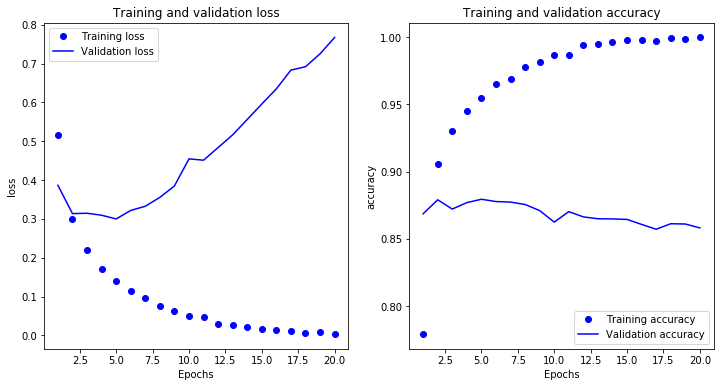

In [67]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
plot_by_epoch(loss_values, val_loss_values, 'loss', ax[0])
plot_by_epoch(acc_values, val_acc_values, 'accuracy', ax[1])

In [73]:
model = build_model()
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 75us/step - loss: 0.4538 - acc: 0.8258
Epoch 2/4
25000/25000 [==============================] - 1s 44us/step - loss: 0.2614 - acc: 0.9098
Epoch 3/4
25000/25000 [==============================] - 1s 46us/step - loss: 0.2001 - acc: 0.9290
Epoch 4/4
25000/25000 [==============================] - 2s 81us/step


In [74]:
results

[0.29248451070308684, 0.88516]